In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [24]:
# load dataset
data = pd.read_csv("./cleandata_one_hot_only_v2.csv", header=0)
data = data.drop('Unnamed: 0', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gender_Female                             50000 non-null  bool   
 1   Gender_Male                               50000 non-null  bool   
 2   Smoking_0                                 50000 non-null  bool   
 3   Smoking_1                                 50000 non-null  bool   
 4   Alcohol_Consumption_0                     50000 non-null  bool   
 5   Alcohol_Consumption_1                     50000 non-null  bool   
 6   Physical_Activity_Level_High              50000 non-null  bool   
 7   Physical_Activity_Level_Low               50000 non-null  bool   
 8   Physical_Activity_Level_Moderate          50000 non-null  bool   
 9   Diabetes_0                                50000 non-null  bool   
 10  Diabetes_1                        

In [25]:
X = data.drop('Heart_Attack_Risk', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gender_Female                             50000 non-null  bool   
 1   Gender_Male                               50000 non-null  bool   
 2   Smoking_0                                 50000 non-null  bool   
 3   Smoking_1                                 50000 non-null  bool   
 4   Alcohol_Consumption_0                     50000 non-null  bool   
 5   Alcohol_Consumption_1                     50000 non-null  bool   
 6   Physical_Activity_Level_High              50000 non-null  bool   
 7   Physical_Activity_Level_Low               50000 non-null  bool   
 8   Physical_Activity_Level_Moderate          50000 non-null  bool   
 9   Diabetes_0                                50000 non-null  bool   
 10  Diabetes_1                        

In [26]:
y = data['Heart_Attack_Risk'] # Target variable
y.info()
nan_count = y.isnull().sum().sum()
print('Number of NaN values:', nan_count)

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Heart_Attack_Risk
Non-Null Count  Dtype
--------------  -----
50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB
Number of NaN values: 0


In [27]:
# smote = SMOTE(random_state=0)
# X_sampled, y_sampled = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
model =OneVsRestClassifier(LogisticRegression( solver='lbfgs', max_iter=1000, class_weight='balanced'))
model.fit(X_train, y_train)
yhat = model.predict(X_test)


In [29]:
print(confusion_matrix(y_test, yhat))
print(accuracy_score(y_test, yhat))

[[3891 3676]
 [3710 3723]]
0.5076


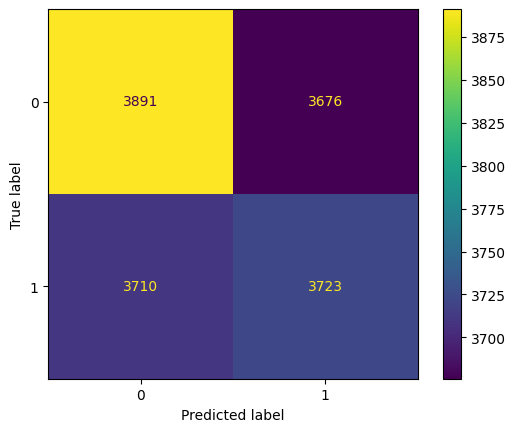

In [30]:
cm = confusion_matrix(y_test, yhat, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [31]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51      7567
           1       0.50      0.50      0.50      7433

    accuracy                           0.51     15000
   macro avg       0.51      0.51      0.51     15000
weighted avg       0.51      0.51      0.51     15000



In [32]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(f'Accuracy scores: {scores}')
print(f'Mean Accuracy: {scores.mean():.4f}')

Accuracy scores: [0.505  0.5098 0.5022 0.4978 0.4958 0.4938 0.495  0.5062 0.5054 0.4928]
Mean Accuracy: 0.5004
